<a href="https://colab.research.google.com/github/paulaleite/aprendizagemDeMaquinaa2022/blob/main/Aquecimento_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aquecimento com SOM
## *Paula Torales Leite*
### Case: Iris

A proposta desta atividade é compilar os conceitos de SOM e exemplos em python em um problema conhecido: base de dados Iris.

Qual a ideia:

1) Fazer uma análise exploratória da base Iris (atividade feita em outros exercícios, exemplo, scatter plot com uso da classe para rotular o objeto e identificação de cada objeto da base no gráfico)

2) separar para fins de treinamento do SOM a informação da classe da base Iris e treinar o SOM

3) explorar os seguintes recursos visuais:

 - erro de quantização (qe) e topologico (te)

 - histograma de neurônios vencedores

 - mapa de calor com a informação de classe

 - histograma de distribuição de classe em cada neurônio

4) por fim, separe os pesos dos neurônios e crie um gráfico de scatter plot que sebreponha os pesos (se der para criar um rótulo melhor ainda) com os objetos do conjunto de dados (separe duas dimensões quaisquer - e lembre de fazer o mesmo com os pesos)

## Importações

In [ ]:
# Instalação do SOM
! python -m pip install minisom --verbose

Using pip 21.1.3 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home 

In [ ]:
# Bibliotecas padrões
import pandas as pd
import numpy as np

# Bibliotecas de Plotagem
from matplotlib import pyplot as plt
%matplotlib inline

# Modelagem e Aprendizagem de Máquina
from sklearn import datasets
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
iris = datasets.load_iris()

## Análise Exploratória

Atributos

In [ ]:
X = pd.DataFrame(iris.data[:, :4])
y = pd.DataFrame(iris.target)
iris_df = pd.concat([X,y], axis=1)
iris_df
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
print(iris_df)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [ ]:
iris_df.dtypes

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species           int64
dtype: object

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Cálculos de Estatística Exploratória

In [ ]:
sl = iris_df["Sepal_Length"]

In [ ]:
# Média
media_sl = np.mean(sl)
print(media_sl)

5.843333333333334


In [ ]:
# Mediana
mediana_sl = np.median(sl)
print(mediana_sl)

5.8


In [ ]:
# Variância
variancia_sl = np.var(sl)
print(variancia_sl)

0.6811222222222223


In [ ]:
# Desvio Padrão
desvio_padrao_sl = np.std(sl)
print(desvio_padrao_sl)

0.8253012917851409


### Faixas de Valores

In [ ]:
# Valor Mínimo
sl_min = np.min(sl)
print(sl_min)

4.3


In [ ]:
# Valor Máximo
sl_max = np.max(sl)
print(sl_max)

7.9


### Análise Exploratória Visual

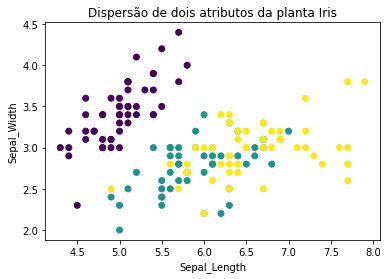

In [ ]:
X = iris.data[:, :4]
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.title("Dispersão de dois atributos da planta Iris")
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.show()

## SOM

In [ ]:
# Normalização dos dados
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 0, iris.data)
print(data[:10])

[[0.07056264 0.09254209 0.02754801 0.01150242]
 [0.06779548 0.07932179 0.02754801 0.01150242]
 [0.06502832 0.08460991 0.02558029 0.01150242]
 [0.06364474 0.08196585 0.02951572 0.01150242]
 [0.06917906 0.09518615 0.02754801 0.01150242]
 [0.07471338 0.10311833 0.03345115 0.02300485]
 [0.06364474 0.08989803 0.02754801 0.01725364]
 [0.06917906 0.08989803 0.02951572 0.01150242]
 [0.06087757 0.07667773 0.02754801 0.01150242]
 [0.06779548 0.08196585 0.02951572 0.00575121]]


In [ ]:
# Divisão da base em treinamento e teste
train = pd.DataFrame(iris.data)
test = pd.DataFrame(iris.target)

# Separação de 20% de treinamento e teste para avaliação
X_train, X_test, y_train, y_test = train_test_split(train, test,
    test_size=0.2, shuffle = True, random_state = 8)

# Set de validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))
print("X_val: {}".format(y_train.shape))
print("y val: {}".format(y_test.shape))

X_train: (90, 4)
X_test: (30, 4)
y_train: (90, 1)
y_test: (30, 1)
X_val: (90, 1)
y val: (30, 1)


In [ ]:
# Inicialização e treinamento
n_neurons = 9
m_neurons = 9
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.005575030792058643


### Erro de Quantização (qe) e Topologico (te)

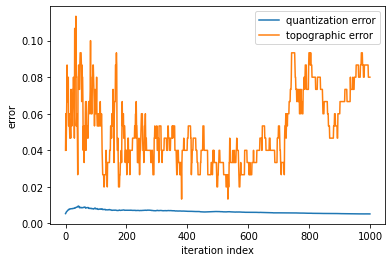

In [ ]:
max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

### Histograma de Neurônios encedores


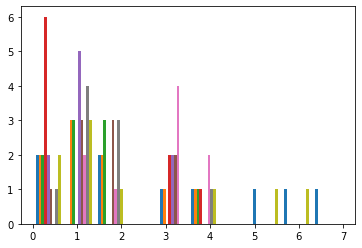

In [ ]:
frequencies = som.activation_response(data)
plt.hist(frequencies)
plt.show()

### Mapa de Calor com a Informação de Classe

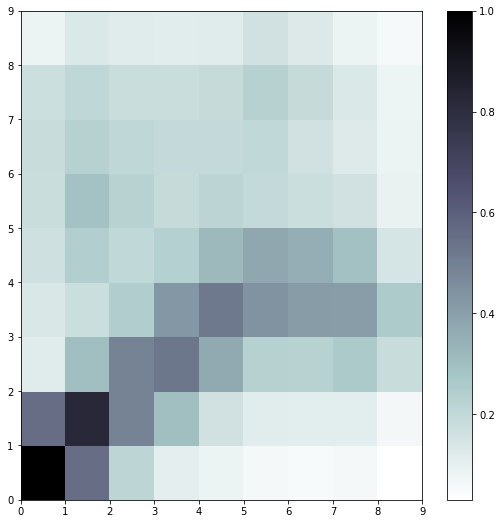

In [ ]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

plt.show()

### Histograma de distribuição de classe em cada neurônio

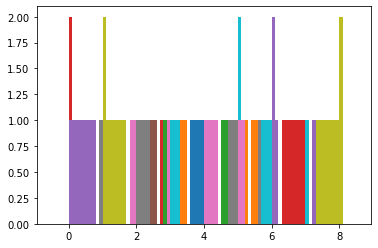

In [ ]:
max_iter = 150

for i in range(max_iter):
  neurons = som.winner(data[i])
  plt.hist(neurons)

plt.show()

### Scatter Plot

IndexError: ignored

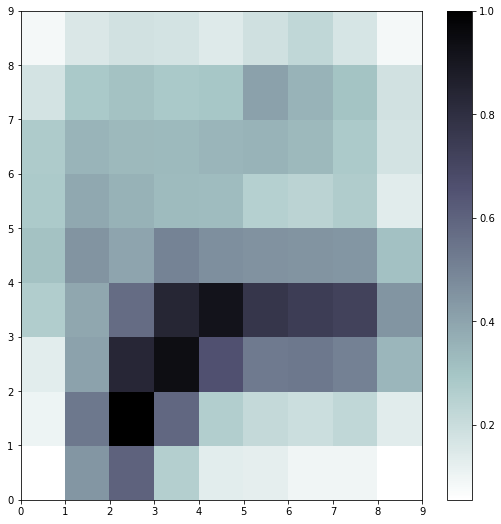

In [ ]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
target = data['target'].values
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[y_val[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()